In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
print(tf.__version__)

2.4.1


In [15]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train/'
valid_path = 'Dataset/Test'

In [16]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80142336/80134624 [==============================] - 231s 3us/step


In [17]:
for layer in mobilnet.layers:
    layer.trainable = False

In [18]:
folders = glob('Dataset/Train/*')


In [19]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [20]:
x = Flatten()(mobilnet.output)


In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=mobilnet.input, outputs=prediction)

In [22]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
from tensorflow.keras.layers import MaxPooling2D


In [24]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [25]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [28]:
training_set


In [29]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [31]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/home/prompt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 15s 1s/step - loss: 4.3382 - accuracy: 0.5455 - val_loss: 1.0424 - val_accuracy: 0.3582
Epoch 2/50
13/13 [==============================] - 14s 1s/step - loss: 0.6902 - accuracy: 0.6147 - val_loss: 0.7764 - val_accuracy: 0.4478
Epoch 3/50
13/13 [==============================] - 14s 1s/step - loss: 0.5250 - accuracy: 0.7255 - val_loss: 0.9349 - val_accuracy: 0.3433
Epoch 4/50
13/13 [==============================] - 15s 1s/step - loss: 0.4149 - accuracy: 0.8106 - val_loss: 1.0304 - val_accuracy: 0.4179
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.3836 - accuracy: 0.8110 - val_loss: 0.8146 - val_accuracy: 0.4478
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.3794 - accuracy: 0.8338 - val_loss: 0.9580 - val_accuracy: 0.4627
Epoch 7/50
13/13 [==============================] - 14s 1s/step - loss: 0.3754 - accuracy: 0.8177 - val_loss: 0.7278 - val_accuracy: 0.5149
Epoch 8/50
13/13 [==

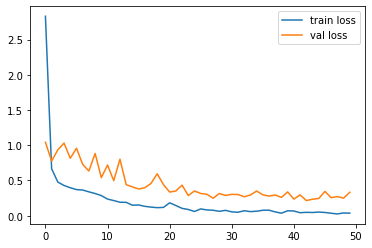

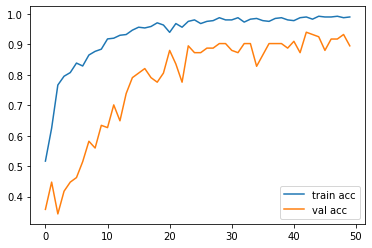

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [34]:
y_pred = model.predict(test_set)


In [35]:
y_pred

array([[8.71825933e-01, 1.28174052e-01],
       [1.12438882e-02, 9.88756120e-01],
       [1.00000000e+00, 9.53495061e-09],
       [9.99988317e-01, 1.16278388e-05],
       [1.00000000e+00, 5.76295989e-08],
       [9.99896407e-01, 1.03551611e-04],
       [3.24856728e-01, 6.75143301e-01],
       [1.00000000e+00, 3.28540217e-08],
       [6.61926940e-02, 9.33807313e-01],
       [9.99685764e-01, 3.14246776e-04],
       [9.98733938e-01, 1.26610918e-03],
       [7.10443556e-01, 2.89556444e-01],
       [4.49595012e-04, 9.99550402e-01],
       [9.99979377e-01, 2.05770575e-05],
       [9.99942303e-01, 5.76717757e-05],
       [1.00000000e+00, 2.00579549e-12],
       [7.32835591e-01, 2.67164439e-01],
       [6.88167930e-01, 3.11832100e-01],
       [2.96863783e-02, 9.70313668e-01],
       [1.25627182e-02, 9.87437308e-01],
       [9.99997973e-01, 2.07728272e-06],
       [1.53068766e-01, 8.46931219e-01],
       [1.00000000e+00, 3.33590031e-11],
       [9.99981880e-01, 1.80807474e-05],
       [9.999829

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1])

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_vgg19.h5')


In [40]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [41]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [42]:
x.shape


(224, 224, 3)

In [43]:
x=x/255


In [44]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [45]:
model.predict(img_data)


array([[0., 1.]], dtype=float32)

In [46]:
a=np.argmax(model.predict(img_data), axis=1)


In [48]:

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [49]:
git diff

SyntaxError: invalid syntax (<ipython-input-49-28ce21bc39e0>, line 1)